In [17]:
#Library includes
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow, figure
import numpy as np # Needed for remove_blur
import scipy.ndimage
from scipy import ndimage, misc
from scipy.ndimage.filters import gaussian_filter   # Needed for xdog, dog and hatch
import cv2 # Needed for xdog, dog, hatch and remove_blur
import pytest # Needed for the PyTest testing framework
import requests                                     # Needed for get_links_in_a_url
import re                                           # Needed for get_links_in_a_url
import vlc # Needed by media_player_vlc
import time # Needed by media_player_vlc
from utils import alpha_blending, showimage, reading_in_an_image, xdog, dog, hatch, threshold, sobel, laplace, gaussian_blur, erode, edge_canny, grayscale, save_to_file, dilate
import math # Needed for find_string_in_index
import os # Needed for find_string_in_index
import glob # Needed for reading_in_an_image
import sys

In [18]:
# Load two images
img1 = cv2.imread('data/utm_00000.mask.png')
img2 = cv2.imread('data/utm_00002.mask.png')

In [19]:
def outline(image, thickness=1, colour="#FFFFFF"):
    """filter: outline - it will get a mask image and a keyword argument (outline thickness) and a color argument.
    It will dilate the source mask image by the thickness (e.g. thickness = 2) and it will XOR or DIFF the dilated
    image and the original image, leaving only a thin outline around the original mask. The oputline is then drawn
    by the specific color."""
    dilated_image = dilate(image, kernel_size=(thickness, thickness))
    outline_image = binary_xor(dilated_image, image) # dilated_image and original image
    # coloured_image = colour_the_image() # Will be implemented later and return the coloured image
    return outline_image

In [20]:
def binary_xor(img2, img1):
    # Take only region of logo from logo image.
    dst2 = img2.astype(np.uint8)
    dst1 = img1.astype(np.uint8)
    dst2_fg = cv2.bitwise_xor(dst2, dst1)
    return dst2_fg

In [21]:
def binary_and(img2, img1):
    # Take only region of logo from logo image.
    dst2 = img2.astype(np.uint8)
    dst1 = img1.astype(np.uint8)
    dst2_fg = cv2.bitwise_and(dst2, dst1)
    return dst2_fg

In [22]:
def binary_inversion(img):
    # Take only region of logo from logo image.
    dst1 = img.astype(np.uint8)
    dst1_fg = cv2.bitwise_not(dst1)
    return dst1_fg

In [23]:
def binary_difference(img2, img1):
    dst2 = binary_inversion(img2)
    dst1 = binary_xor(img1, dst2)
    return dst1

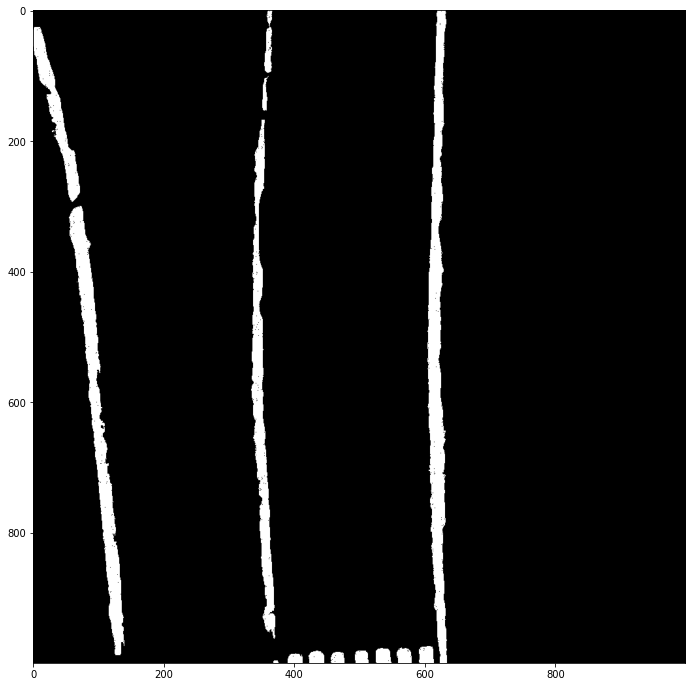

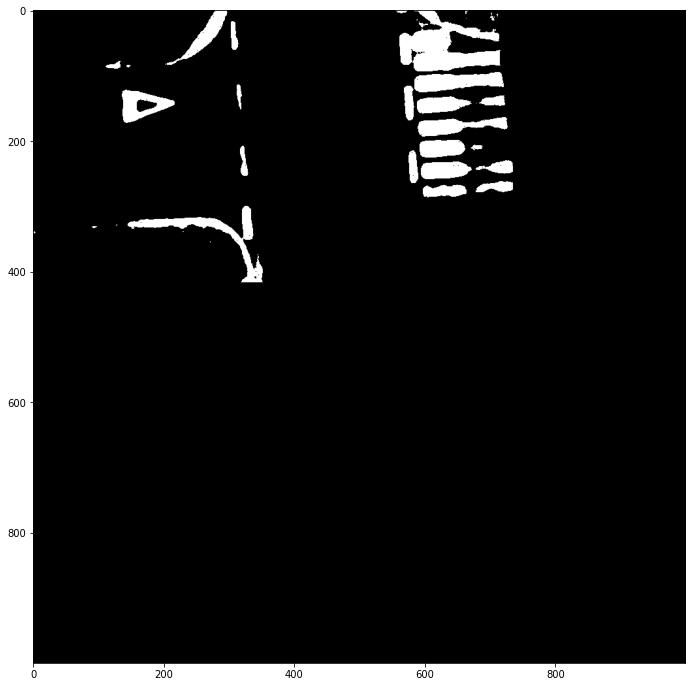

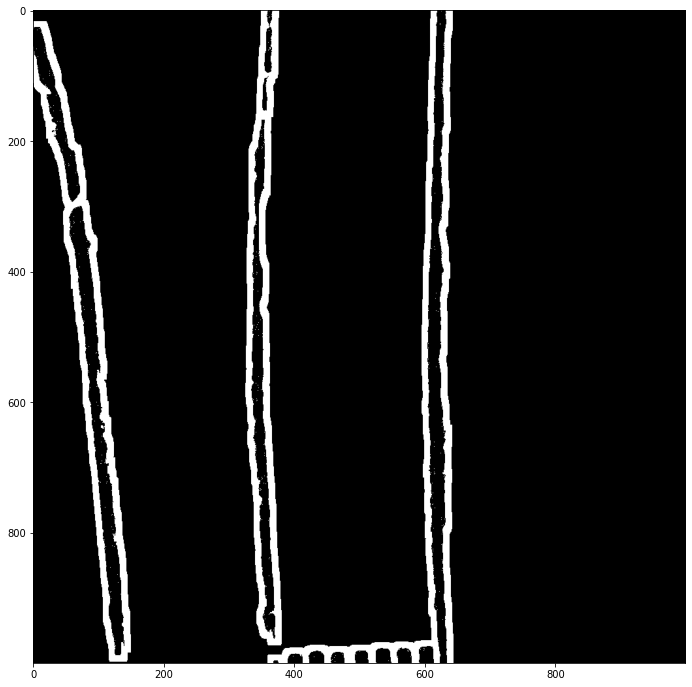

In [24]:
showimage(img1)
showimage(img2)
outlined_image = outline(img1, thickness=20)
showimage(outlined_image)

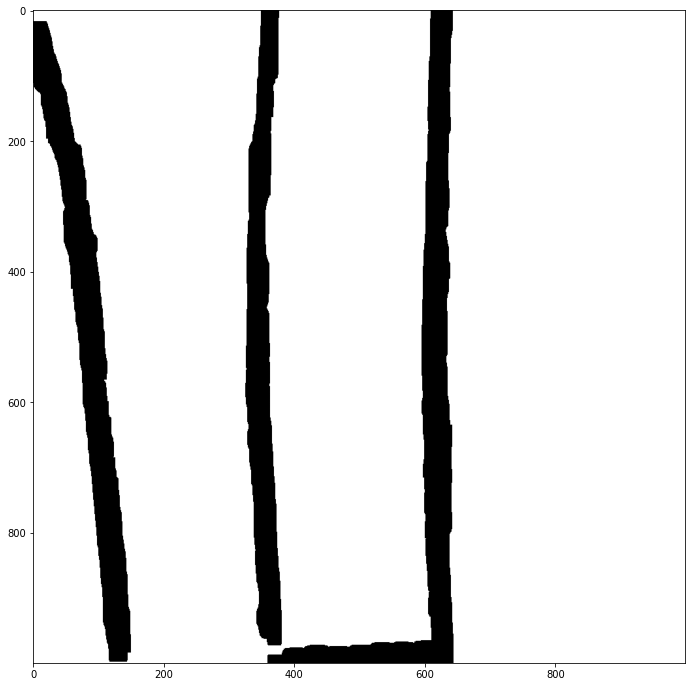

In [26]:
xored_image = binary_difference(img1, outlined_image)
showimage(xored_image)